In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [5]:
# initializing column transformer
mct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [6]:
# initialzing features and labels
X = data.drop(["charges"], axis = 1)
y = data["charges"]
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [7]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
# spliting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
type(X_train)

pandas.core.frame.DataFrame

In [10]:
# fitting the column transformer
mct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [11]:
# normalization numerical data and trnasformation categorical data
X_train_normal = mct.transform(X_train)
X_test_normal = mct.transform(X_test)

In [12]:
X_train.loc[3]

age                33
sex              male
bmi            22.705
children            0
smoker             no
region      northwest
Name: 3, dtype: object

In [13]:
X_train_normal[3]

array([0.45652174, 0.49394673, 1.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        ])

In [14]:
X_train_normal.shape, X_train.shape


((1070, 11), (1070, 6))

In [15]:
# building the model to predict charges

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.mae,
              metrics="mae")
model.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13344.0742 - mae: 13344.0742
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13335.6943 - mae: 13335.6943
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13314.6914 - mae: 13314.6914
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13269.9502 - mae: 13269.9502
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.7695 - mae: 13189.7695
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13062.7500 - mae: 13062.7500
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12878.7559 - mae: 12878.7559
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12627.8750 - mae: 12627.8750
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12300.0537 - mae: 12300.0537
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11892.45

In [16]:
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3439.6567 - mae: 3439.6567


[3439.65673828125, 3439.65673828125]

In [17]:
# building the model to predict charges with lr = 0.01

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
              loss = tf.keras.losses.mae,
              metrics=["mae"])
model_2.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13210.7656 - mae: 13210.7656
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 11308.1855 - mae: 11308.1855
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 8079.3784 - mae: 8079.3784
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7565.3179 - mae: 7565.3179
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7065.4009 - mae: 7065.4009
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6444.1318 - mae: 6444.1318
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 5484.3506 - mae: 5484.3506
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 4350.3608 - mae: 4350.3608
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 3728.3147 - mae: 3728.3147
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 3674.3245 - mae: 3674.

In [18]:
model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3179.4993 - mae: 3179.4993


[3179.499267578125, 3179.499267578125]

In [19]:
# changing the model, increasing the number of epochs to 200

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
              loss = tf.keras.losses.mae,
              metrics=["mae"])
model_3.fit(X_train_normal, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13228.6816 - mae: 13228.6816
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 11426.5742 - mae: 11426.5742
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 8117.1167 - mae: 8117.1167
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7578.1421 - mae: 7578.1421
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 7086.9155 - mae: 7086.9155
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6485.0664 - mae: 6485.0664
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 5550.6245 - mae: 5550.6245
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 4398.6421 - mae: 4398.6421
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 3740.1870 - mae: 3740.1870
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3673.8879 - mae: 3673.

In [20]:
model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3179.4993 - mae: 3179.4993


[3179.499267578125, 3179.499267578125]

In [21]:
# adding activation function
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "relu"),
])

model_4.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
              loss = tf.keras.losses.mae,
              metrics=["mae"])
model_4.fit(X_train_normal, y_train, epochs = 200, verbose = 0)

In [22]:
model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1965.5947 - mae: 1965.5947


[1965.5947265625, 1965.5947265625]

In [23]:
# add one more layer with 100 nodes
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "relu"),
])

model_5.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
              loss = tf.keras.losses.mae,
              metrics=["mae"])
model_5.fit(X_train_normal, y_train, epochs = 200, verbose = 0)

In [24]:
model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1824.6331 - mae: 1824.6331


[1824.633056640625, 1824.633056640625]

In [40]:
# add one more layer with 100 nodes
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "relu"),
])

model_6.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
              loss = tf.keras.losses.mae,
              metrics=["mae"])
h= model_6.fit(X_train_normal, y_train, epochs = 200, verbose = 0)

In [39]:
tf.random.set_seed(42)
model_6.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1863.1368 - mae: 1863.1368


[1863.1368408203125, 1863.1368408203125]

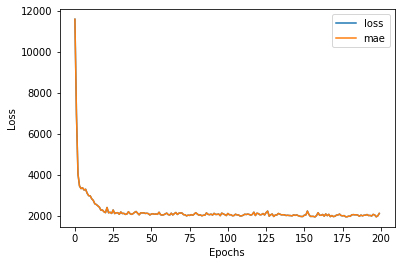

In [41]:
pd.DataFrame(h.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss");

In [28]:
#increasing number of epochs
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "relu"),
])

model_7.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              loss = tf.keras.losses.mae,
              metrics="mae")
h = model_7.fit(X_train_normal, y_train, epochs = 300, verbose=0)

In [29]:
model_7.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1405.2688 - mae: 1405.2688


[1405.268798828125, 1405.268798828125]

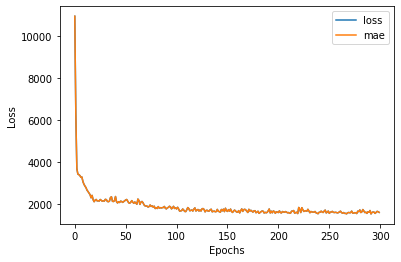

In [30]:
pd.DataFrame(h.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss");

In [31]:
#changing learning rate
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "relu"),
])

model_8.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
              loss = tf.keras.losses.mae,
              metrics="mae")
h = model_8.fit(X_train_normal, y_train, epochs = 300, verbose=0)

In [32]:
model_8.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1372.0563 - mae: 1372.0563


[1372.0562744140625, 1372.0562744140625]

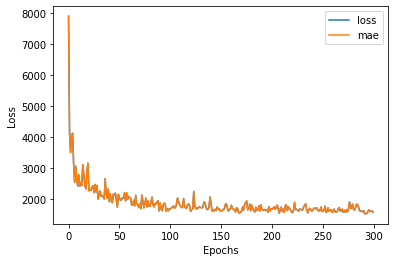

In [33]:
pd.DataFrame(h.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss");